# Customer Segmentation

Using PCA and unsupervised clustering methods, cluster customers based on customer features


In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import calinski_harabasz_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in dataframe
df_main = pd.read_csv('../Resources/digested/customer_profiles.csv')

In [3]:
# Inspection
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49673 entries, 0 to 49672
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             49673 non-null  int64  
 1   customer_name           49673 non-null  object 
 2   customer_age            49673 non-null  int64  
 3   gender                  49673 non-null  object 
 4   order_count             49673 non-null  int64  
 5   orders_returned         49139 non-null  float64
 6   total_churn             49673 non-null  int64  
 7   tenure_days             49673 non-null  int64  
 8   average_total_per_cart  49673 non-null  float64
 9   total_qty_purchased     49673 non-null  int64  
 10  total_spent_historic    49673 non-null  int64  
 11  payment_creditcard      49673 non-null  int64  
 12  payment_debit           49673 non-null  int64  
 13  payment_crypto          49673 non-null  int64  
 14  payment_paypal          49673 non-null

In [4]:
# Inspection
df_main.head()

customer_id       customer_name  customer_age  gender  order_count  \
0        13989      William Valdez            27  Female            5   
1        32157         Craig Foley            33    Male            3   
2        28452         John Greene            18  Female            3   
3        31766  Brittney Maldonado            41    Male            5   
4         4650      Denise Hopkins            37    Male            3   

   orders_returned  total_churn  tenure_days  average_total_per_cart  \
0              2.0            5          819              222.200000   
1              1.0            0          452              390.000000   
2              1.0            0          895              157.333333   
3              3.0            0          978              233.400000   
4              3.0            0          322              209.333333   

   total_qty_purchased  total_spent_historic  payment_creditcard  \
0                   19                 10726                   1   
1                    4                  5661                   1   
2                   14                  3739                   1   
3                   16                  9796                   1   
4                    5                  9040                   2   

   payment_debit  payment_crypto  payment_paypal  payment_cash  \
0              0               1               2             1   
1              0               0               2             0   
2              0               0               2             0   
3              0               0               2             2   
4              0               0               0             1   

   cat_electronics  cat_home  cat_clothing  cat_books  
0                3         1             0          1  
1                0         1             0          2  
2                1         0             0          2  
3                1         0             3          1  
4                0         1             1          1

In [5]:
# Encode gender
df_main['gender'] = np.where(df_main['gender'] == 'Male', 1, 0)
df_main.head()

customer_id       customer_name  customer_age  gender  order_count  \
0        13989      William Valdez            27       0            5   
1        32157         Craig Foley            33       1            3   
2        28452         John Greene            18       0            3   
3        31766  Brittney Maldonado            41       1            5   
4         4650      Denise Hopkins            37       1            3   

   orders_returned  total_churn  tenure_days  average_total_per_cart  \
0              2.0            5          819              222.200000   
1              1.0            0          452              390.000000   
2              1.0            0          895              157.333333   
3              3.0            0          978              233.400000   
4              3.0            0          322              209.333333   

   total_qty_purchased  total_spent_historic  payment_creditcard  \
0                   19                 10726                   1   
1                    4                  5661                   1   
2                   14                  3739                   1   
3                   16                  9796                   1   
4                    5                  9040                   2   

   payment_debit  payment_crypto  payment_paypal  payment_cash  \
0              0               1               2             1   
1              0               0               2             0   
2              0               0               2             0   
3              0               0               2             2   
4              0               0               0             1   

   cat_electronics  cat_home  cat_clothing  cat_books  
0                3         1             0          1  
1                0         1             0          2  
2                1         0             0          2  
3                1         0             3          1  
4                0         1             1          1

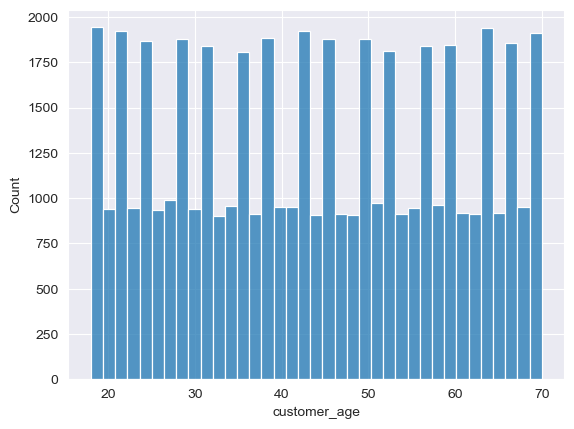

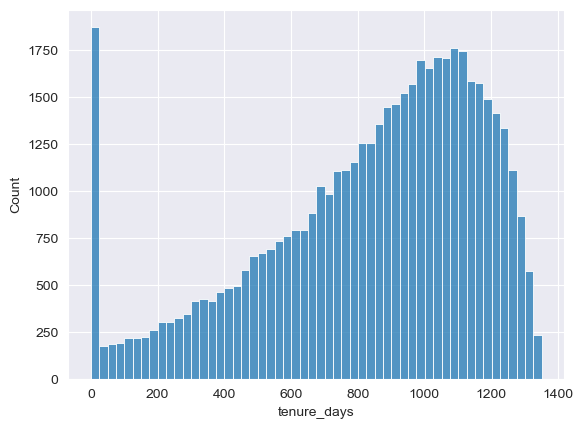

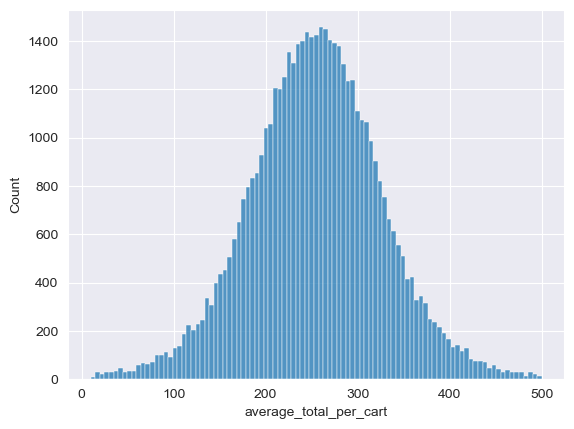

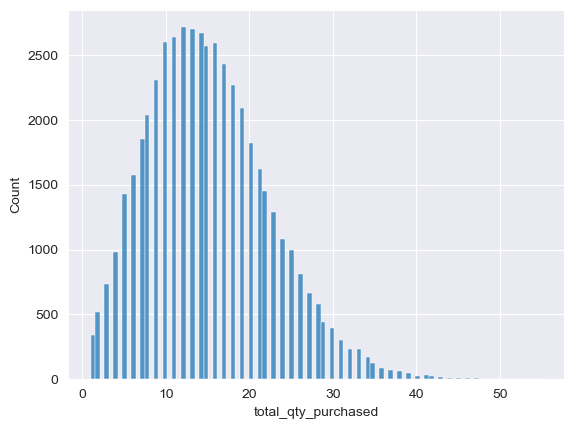

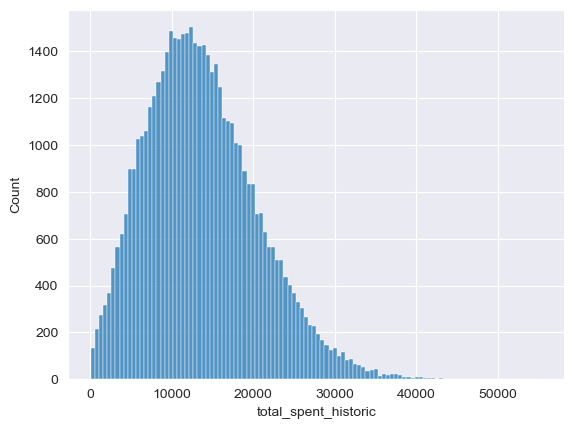

<Figure size 640x480 with 0 Axes>

In [6]:
col_to_scale = ['customer_age', 'tenure_days', 'average_total_per_cart', 'total_qty_purchased', 'total_spent_historic']
for col in col_to_scale:
    sns.histplot(df_main[col])
    plt.show()
    plt.clf()

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

col_to_scale = ['customer_age', 'tenure_days', 'average_total_per_cart', 'total_qty_purchased', 'total_spent_historic']
scaler = ColumnTransformer(
    transformers=[
        ('sc', StandardScaler(), col_to_scale)
    ],
    remainder='passthrough'
)

df_transformed = scaler.fit_transform(df_main)
df_transformed = pd.DataFrame(df_transformed)
df_transformed.columns = col_to_scale + [col for col in df_main.columns if col not in col_to_scale]
df_transformed = df_transformed[df_main.columns]
df_transformed.drop(['customer_id', 'customer_name', 'orders_returned'], axis=1, inplace=True)

<Axes: >

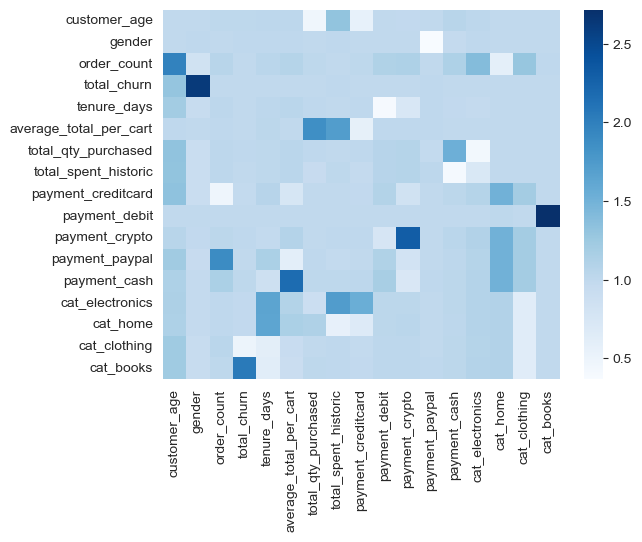

In [8]:
# PCA
pca = PCA()
components = pca.fit(df_transformed).components_
components = pd.DataFrame(np.exp(components), columns=df_transformed.columns).T
components.columns = df_transformed.columns

sns.heatmap(components, cmap='Blues')

In [9]:
var_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(var_ratio)
var_ratio = pd.DataFrame(np.array(['{:.3f}'.format(n) for n in var_ratio]), index=df_transformed.columns)
var_ratio['cumsum'] = cumulative_variance

var_ratio

0    cumsum
customer_age            0.399  0.399122
gender                  0.185  0.584353
order_count             0.070  0.654310
total_churn             0.060  0.714624
tenure_days             0.048  0.762201
average_total_per_cart  0.046  0.808577
total_qty_purchased     0.040  0.848877
total_spent_historic    0.040  0.888506
payment_creditcard      0.039  0.927953
payment_debit           0.024  0.952291
payment_crypto          0.023  0.975252
payment_paypal          0.010  0.985212
payment_cash            0.008  0.993626
cat_electronics         0.006  1.000000
cat_home                0.000  1.000000
cat_clothing            0.000  1.000000
cat_books               0.000  1.000000

In [10]:
pca = PCA(n_components=8)
df_pcomp = pca.fit_transform(df_transformed)
df_pcomp = pd.DataFrame(df_pcomp, columns=df_transformed.columns[:8])
df_pcomp

customer_age    gender  order_count  total_churn  tenure_days  \
0          0.717046  3.964223     1.002991     0.652545     1.906375   
1         -3.332628 -0.133081     0.656673     1.402474     0.067844   
2         -2.765397 -0.291629     0.676987     1.395306    -0.002176   
3         -0.348679 -0.947579     1.250680    -1.352048    -1.143187   
4         -3.226532 -0.159807    -1.200362    -0.001591    -0.404035   
...             ...       ...          ...          ...          ...   
49668     -5.960086  0.568791     0.621228     0.726728    -0.258297   
49669     -2.402560 -0.406673    -0.633753    -0.022875    -0.038820   
49670     -4.452677  0.168700    -0.517676     0.713769     0.081666   
49671     -6.023298  0.594186     0.143150    -0.635641    -0.735384   
49672     -5.867600  0.552339     0.601585     0.743577    -0.409388   

       average_total_per_cart  total_qty_purchased  total_spent_historic  
0                    0.360569             0.364043              0.533122  
1                   -1.144136             1.854881              0.242613  
2                   -1.115057             0.397926             -0.679636  
3                    0.551655            -0.102039              0.357445  
4                    0.411600             0.051543             -0.986114  
...                       ...                  ...                   ...  
49668               -0.614453             1.123429              1.471928  
49669               -0.786280            -0.038065              0.133041  
49670                0.692851             0.800678              0.648531  
49671                0.714534            -3.179375             -1.196692  
49672               -0.604876            -1.792598             -1.112846  

[49673 rows x 8 columns]

/Users/andrewcheng/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andrewcheng/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andrewcheng/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andrewcheng/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

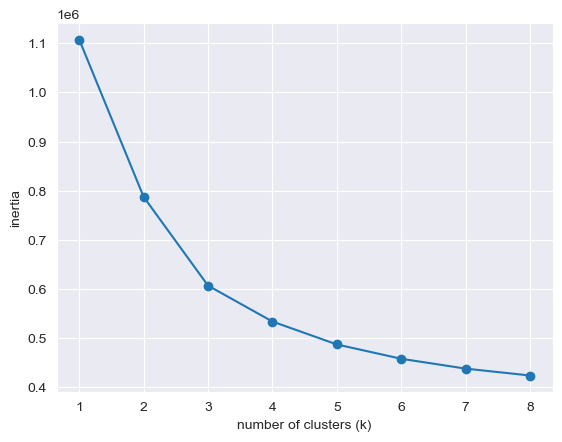

In [11]:
# Kmeans clustering 
num_clusters = list(range(1, 9))
inertias = []
for k in num_clusters:
  model = KMeans(n_clusters=k)
  model.fit(df_pcomp)
  inertias.append(model.inertia_)
  
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')
plt.show()

In [12]:
# KMeans
model = KMeans(n_clusters=4)
model.fit(df_pcomp)
predictions = model.predict(df_pcomp)

/Users/andrewcheng/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
# Add back to dataframe
df_pcomp['predictions'] = predictions
df_pcomp

customer_age    gender  order_count  total_churn  tenure_days  \
0          0.717046  3.964223     1.002991     0.652545     1.906375   
1         -3.332628 -0.133081     0.656673     1.402474     0.067844   
2         -2.765397 -0.291629     0.676987     1.395306    -0.002176   
3         -0.348679 -0.947579     1.250680    -1.352048    -1.143187   
4         -3.226532 -0.159807    -1.200362    -0.001591    -0.404035   
...             ...       ...          ...          ...          ...   
49668     -5.960086  0.568791     0.621228     0.726728    -0.258297   
49669     -2.402560 -0.406673    -0.633753    -0.022875    -0.038820   
49670     -4.452677  0.168700    -0.517676     0.713769     0.081666   
49671     -6.023298  0.594186     0.143150    -0.635641    -0.735384   
49672     -5.867600  0.552339     0.601585     0.743577    -0.409388   

       average_total_per_cart  total_qty_purchased  total_spent_historic  \
0                    0.360569             0.364043              0.533122   
1                   -1.144136             1.854881              0.242613   
2                   -1.115057             0.397926             -0.679636   
3                    0.551655            -0.102039              0.357445   
4                    0.411600             0.051543             -0.986114   
...                       ...                  ...                   ...   
49668               -0.614453             1.123429              1.471928   
49669               -0.786280            -0.038065              0.133041   
49670                0.692851             0.800678              0.648531   
49671                0.714534            -3.179375             -1.196692   
49672               -0.604876            -1.792598             -1.112846   

       predictions  
0                3  
1                0  
2                0  
3                2  
4                0  
...            ...  
49668            0  
49669            0  
49670            0  
49671            0  
49672            0  

[49673 rows x 9 columns]

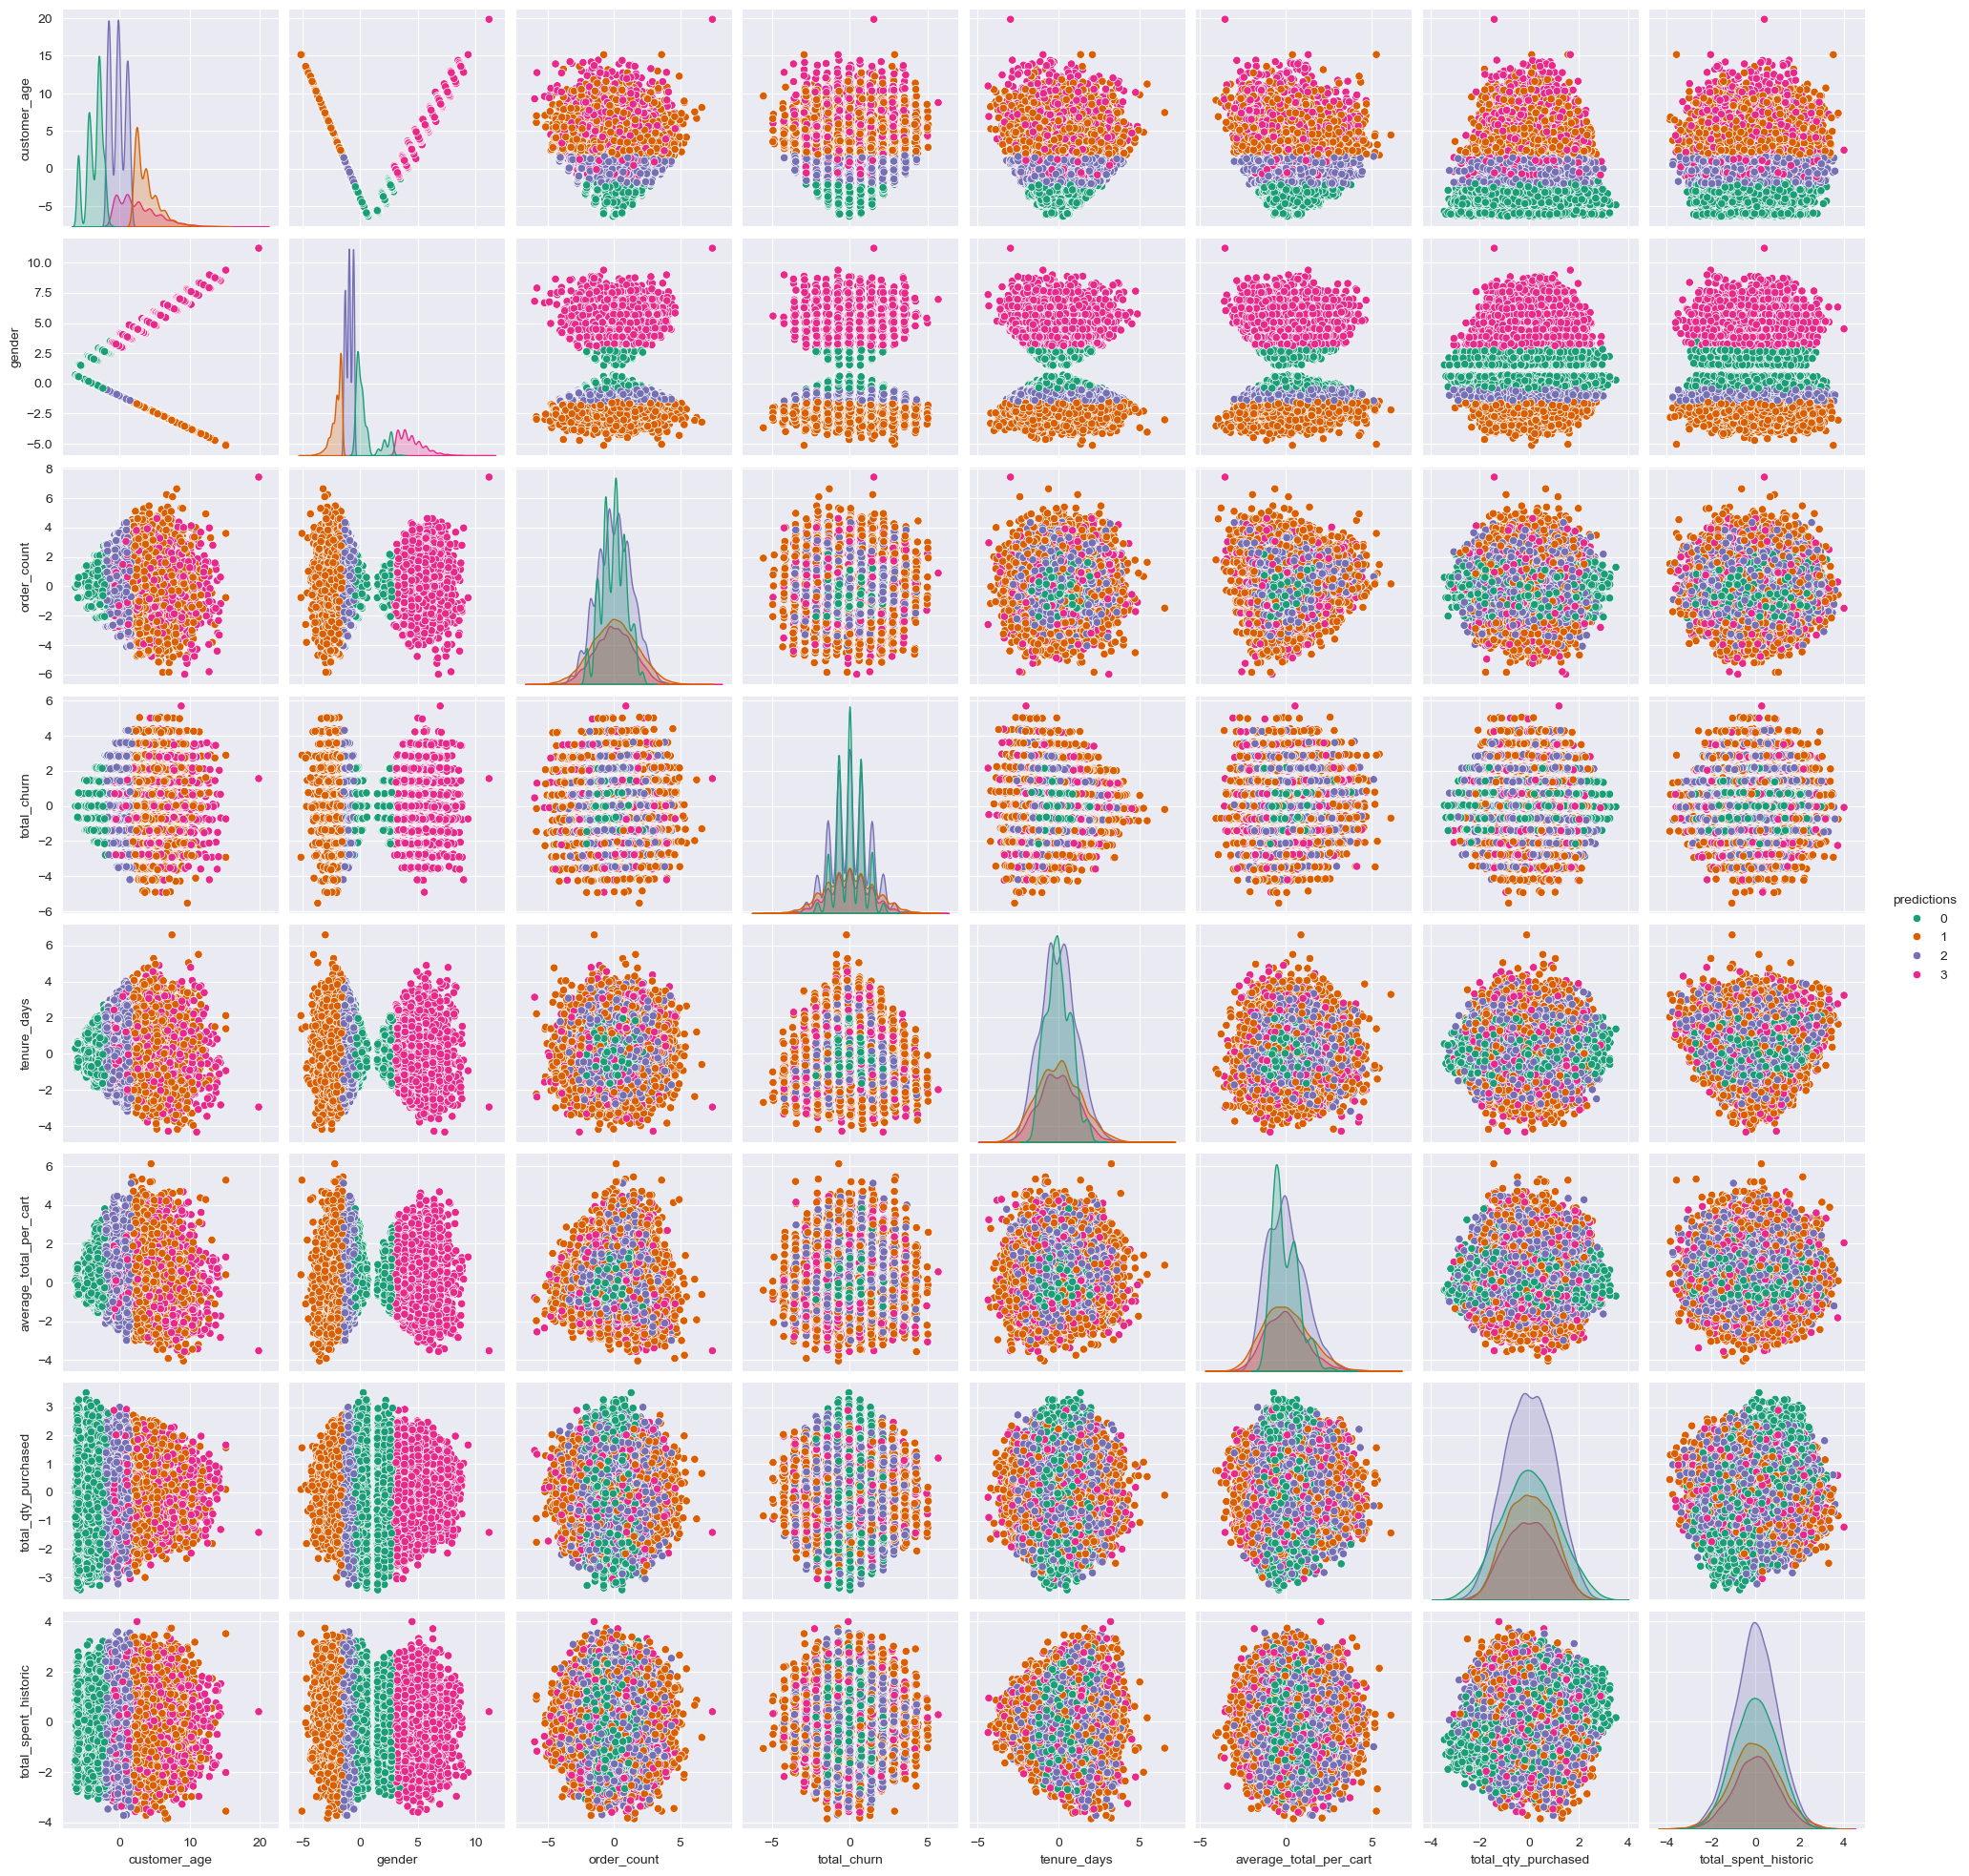

In [14]:
pp_segmented = sns.pairplot(df_pcomp, hue='predictions', palette='Dark2')
plt.show()

In [15]:
pp_segmented.savefig('../Images/PCAKMC_andrew.png', dpi=300, format='png')

In [18]:
# Initialize and fit BIRCH
birch_model = Birch()
birch_model.fit(df_pcomp)

# Get the centroids of the subclusters
centroids = np.array([node for node in birch_model.subcluster_centers_])

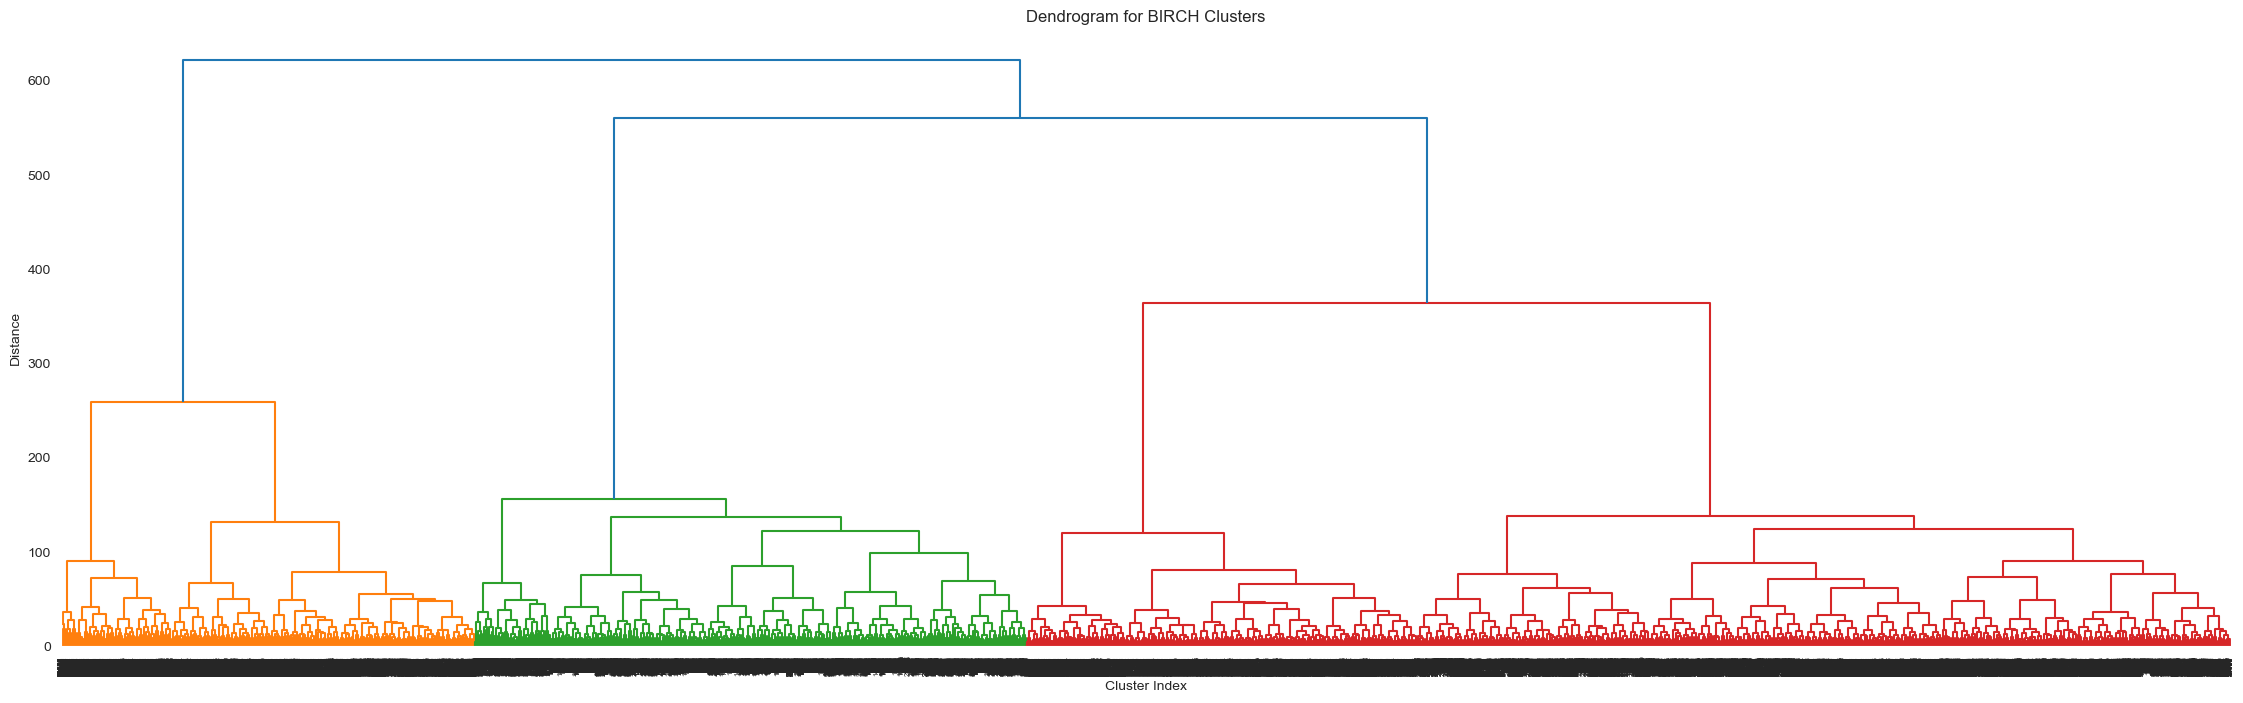

<Figure size 640x480 with 0 Axes>

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram

# methods = ['single', 'complete', 'average', 'ward']
# for method in methods:
#     Z = linkage(centroids, method)
#     fig = plt.figure(figsize=(28,8))
#     dendrogram(Z)
#     plt.title('Dendrogram for BIRCH Clusters')
#     plt.xlabel('Cluster Index')
#     plt.ylabel('Distance')
#     plt.show()
#     plt.clf()

Z = linkage(centroids, 'ward')
fig = plt.figure(figsize=(28,8))
dendrogram(Z)
plt.title('Dendrogram for BIRCH Clusters')
plt.xlabel('Cluster Index')
plt.ylabel('Distance')
plt.show()
plt.clf()

In [20]:
# Birch Clustering
km_predictions = df_pcomp['predictions']
df_pcomp.drop(['predictions'], axis=1)

birch_model = Birch(n_clusters=3)
birch_model.fit(df_pcomp)
birch_pred = birch_model.predict(df_pcomp)


In [21]:
# Cluster score
km_score = calinski_harabasz_score(df_pcomp, km_predictions)
birch_score = calinski_harabasz_score(df_pcomp, birch_pred)
print(km_score, birch_score)

19465.18480501692 17803.80324689462


In [22]:
# Refinement with SVM
from sklearn.svm import SVC

clf = SVC(kernel='rbf', gamma=0.5)
clf.fit(df_pcomp, km_predictions)
svc_predictions = clf.predict(df_pcomp)


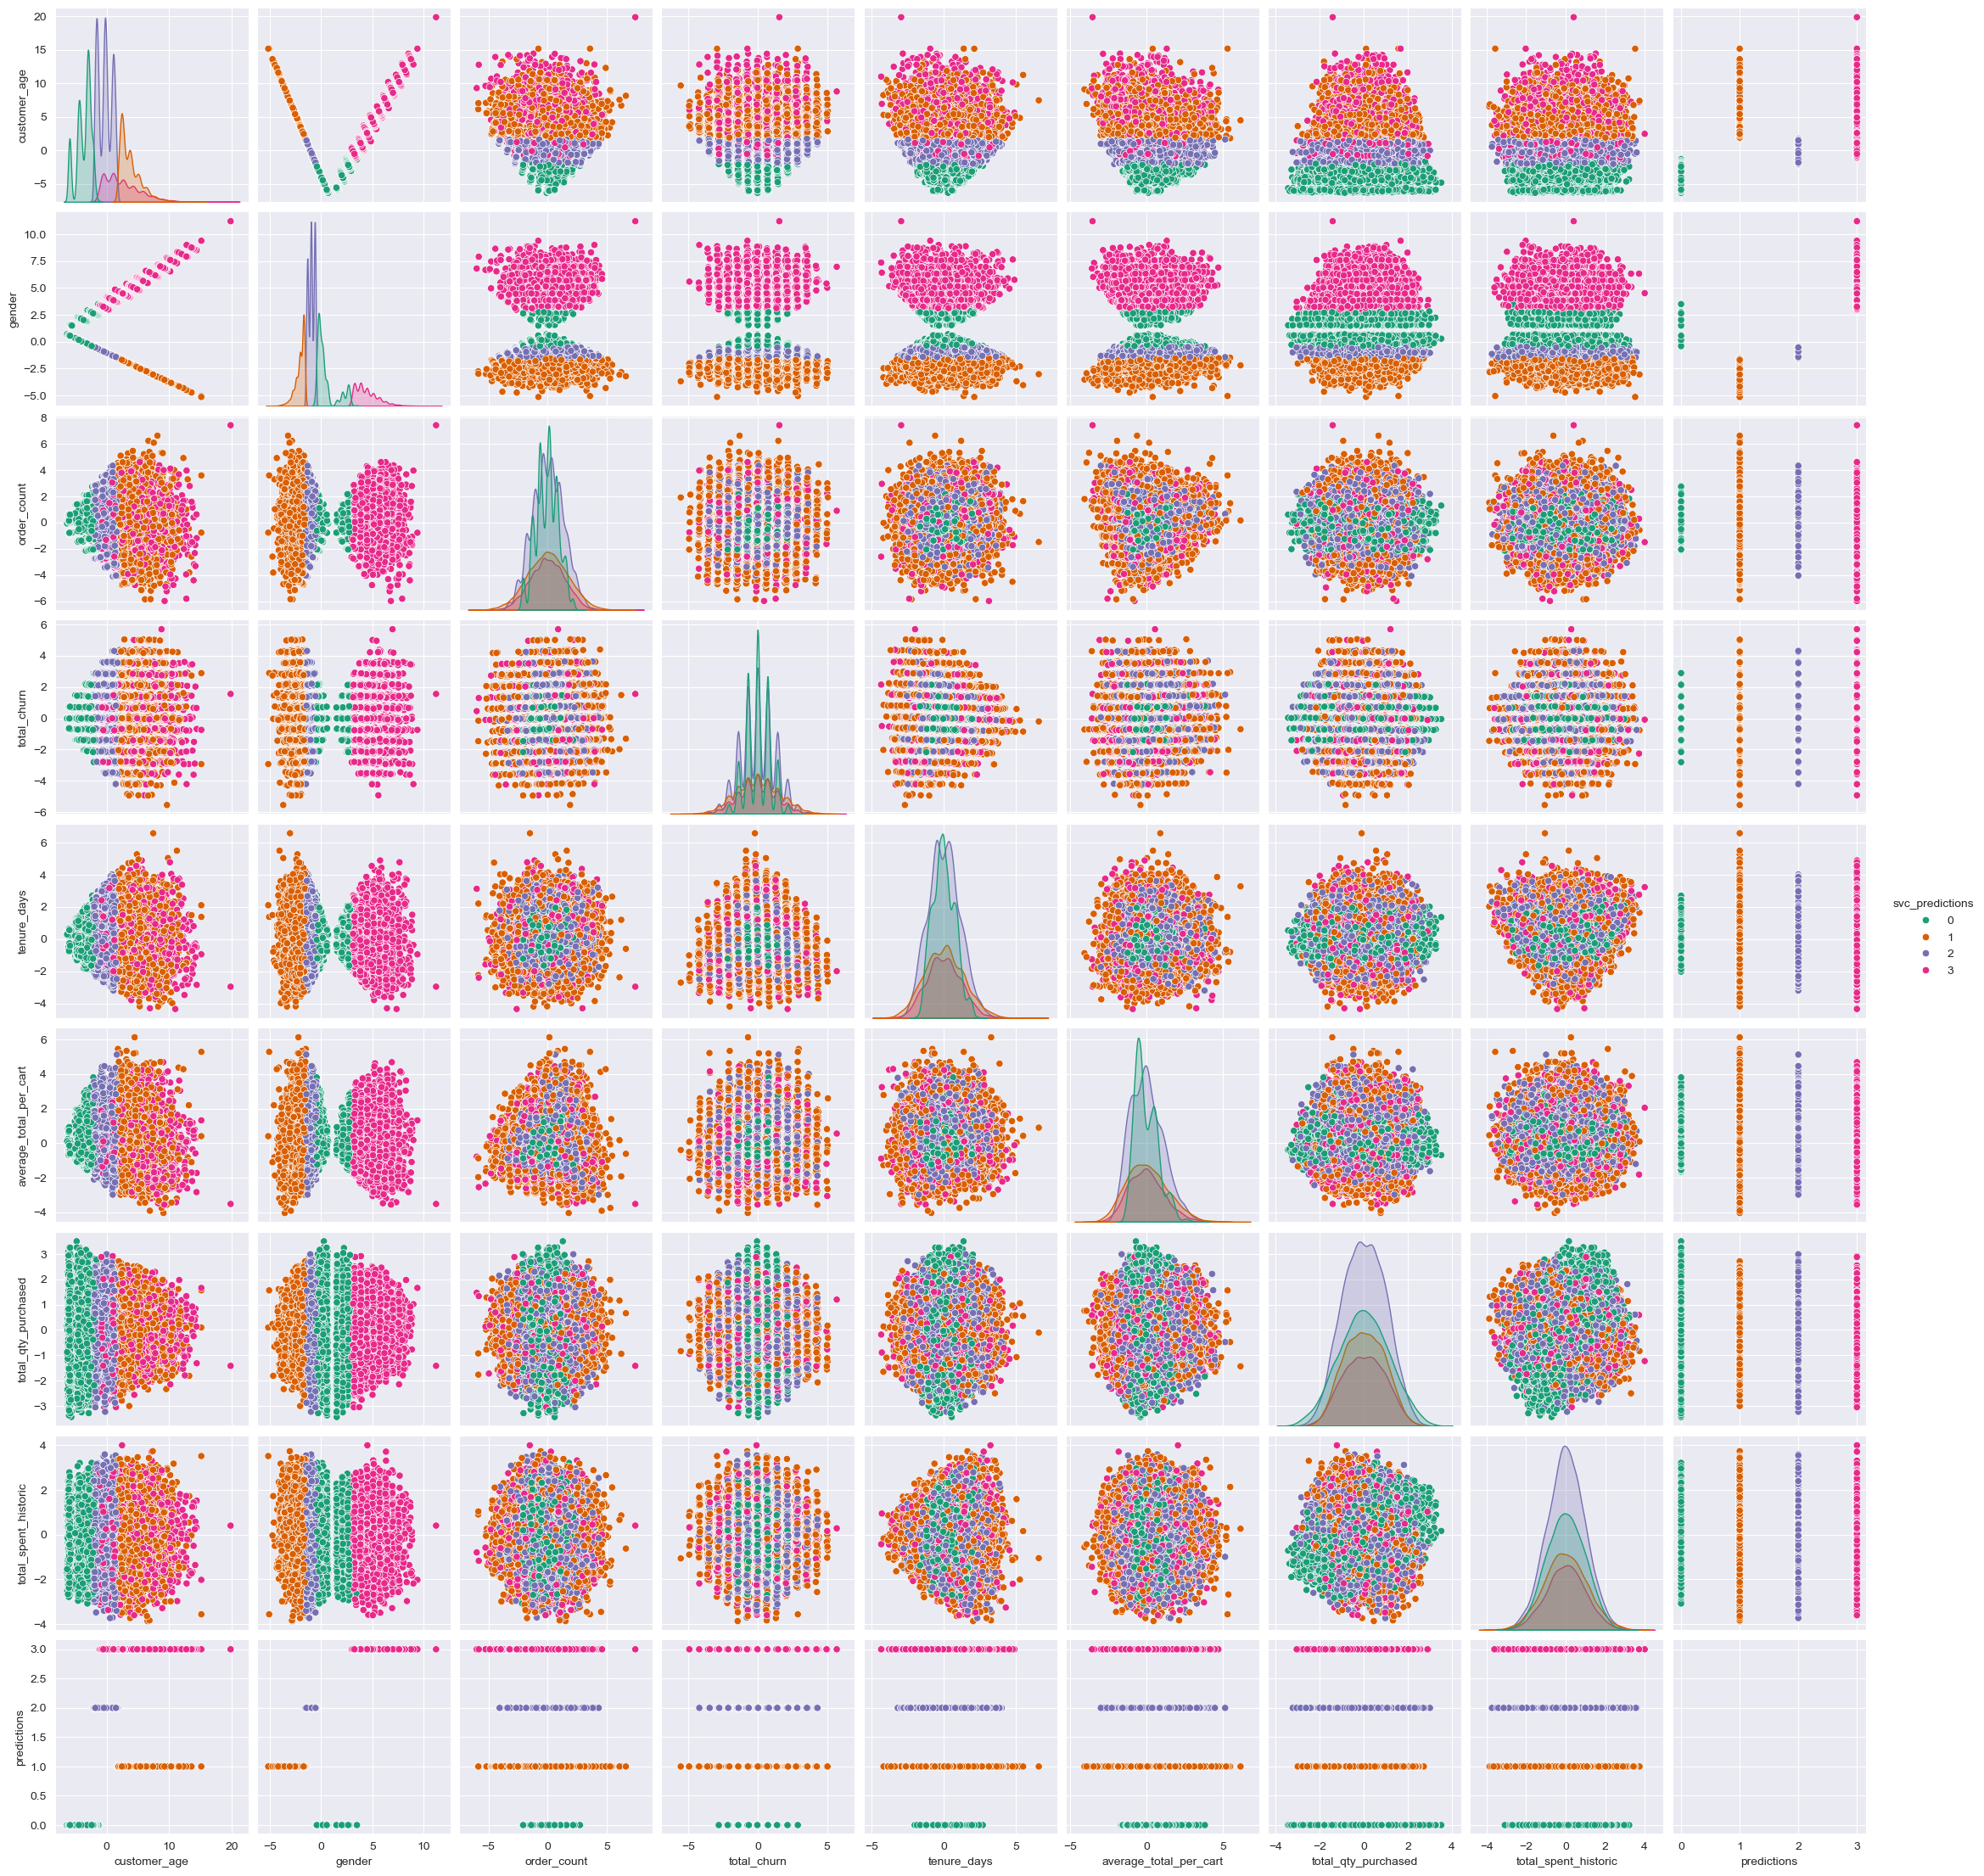

In [23]:
df_pcomp['svc_predictions'] = svc_predictions
pp_segmented_svc = sns.pairplot(df_pcomp, hue='svc_predictions', palette='Dark2')
plt.show()